In [31]:
import scanpy.api as sc
import pandas as pd
import loompy
import numpy as np
import anndata as ad

In [32]:
data1_path = './pairwise/t4k.csv'
data2_path = './pairwise/pbmc4k.csv'

In [33]:
data1 = pd.read_csv(data1_path, sep=",")

In [34]:
data2 = pd.read_csv(data2_path, sep=",")

In [35]:
import scanpy.api as sc
import mnnpy

In [36]:
def pandas_into_adata(dataset):
    var_seq = pd.DataFrame(index=dataset.index)
    obs_seq = pd.DataFrame(index=dataset.columns)
    X_seq = dataset.values.T
    adata_seq = ad.AnnData(X_seq, obs=obs_seq, var=var_seq)
    return adata_seq


In [113]:
adata1 = pandas_into_adata(data1)
adata2 = pandas_into_adata(data2)

In [114]:
%%time
corrected = mnnpy.mnn_correct(adata1, adata2,  batch_categories = ["N0123X", "N0124X"])
adata = corrected[0]

Performing cosine normalization...
Starting MNN correct iteration. Reference batch: 0
Step 1 of 1: processing batch 1
  Looking for MNNs...
  Computing correction vectors...
  Adjusting variance...
  Applying correction...
MNN correction complete. Gathering output...
Packing AnnData object...
Done.
CPU times: user 15min 27s, sys: 3min 17s, total: 18min 45s
Wall time: 6min 5s


         Falling back to preprocessing with `sc.pp.pca` and default params.


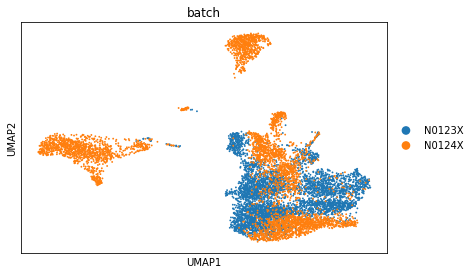

In [119]:
mnn_data = adata
sc.pp.scale(mnn_data)
sc.pp.neighbors(mnn_data)
sc.tl.umap(mnn_data)
sc.pl.umap(mnn_data, color='batch')

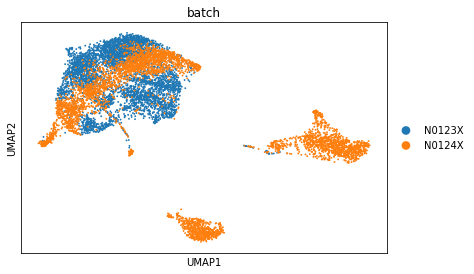

In [12]:
#bdata = adata
#sc.pp.scale(bdata)
#sc.pp.neighbors(bdata)
#sc.tl.umap(bdata)
#sc.pl.umap(bdata, color='batch')

In [120]:
sc.pp.pca(mnn_data)

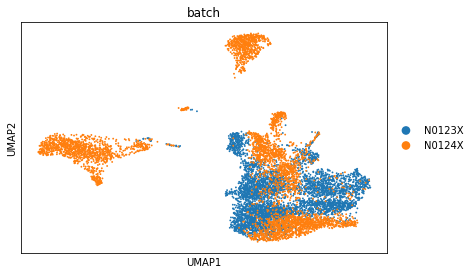

CPU times: user 192 ms, sys: 7.53 ms, total: 200 ms
Wall time: 197 ms


In [121]:
%%time
pca_data = mnn_data
sc.pl.umap(pca_data, color='batch')

In [126]:
pca_data

AnnData object with n_obs × n_vars = 8878 × 2199 
    obs: 'batch'
    uns: 'neighbors', 'batch_colors', 'pca'
    obsm: 'X_pca', 'X_umap', 'X_tsne'
    varm: 'PCs'

In [127]:
pca_data.obsm.X_tsne

array([[ 51.543186 , -16.924507 ],
       [ 45.96937  ,  -7.442956 ],
       [  5.7376695,   1.4425571],
       ...,
       [ -2.0276358,  50.88266  ],
       [-77.256546 ,  -6.2174397],
       [-29.848618 ,  61.047253 ]], dtype=float32)

In [128]:
pca_data.obsm.X_pca

array([[ -8.912993  ,  -5.517926  ,  -1.5395958 , ...,   0.877643  ,
          0.93757635,   0.5950358 ],
       [ -9.82271   ,  -3.9320767 ,  -2.4115572 , ...,   0.5625933 ,
         -0.6352144 ,  -1.509671  ],
       [ -5.777395  ,  -2.011106  ,   0.2582332 , ...,   0.45374024,
         -2.3952227 ,   2.292096  ],
       ...,
       [  5.2202597 ,  14.179259  ,  -2.049241  , ...,   1.9529234 ,
          2.3696988 ,   0.17027584],
       [ -3.3571088 ,  -8.331463  ,  -2.0987175 , ...,   0.4333036 ,
         -0.4545689 ,  -1.8029227 ],
       [ 17.945108  , -12.648836  ,   1.9615396 , ...,   0.79114264,
         -0.4418051 ,   0.22745162]], dtype=float32)

In [122]:
%%time
tsne_data = pca_data
sc.tl.tsne(tsne_data)

CPU times: user 5min 2s, sys: 26.6 s, total: 5min 29s
Wall time: 4min 51s


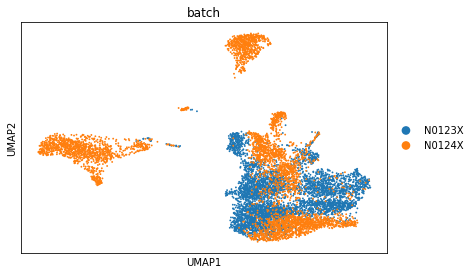

CPU times: user 218 ms, sys: 9.94 ms, total: 228 ms
Wall time: 219 ms


In [123]:
%%time
sc.pl.umap(tsne_data, color='batch')